In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [51]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_05_13'
    file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [85]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [114]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [147]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')
    df = df.iloc[:, 1:]
    return df
df_gross=filePath2Pandas(file())  

In [148]:
df_gross = df_gross.iloc[0:2300, :]
#df_gross.plot()
df_gross

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,22.9950,24.0432,24.3813,24.7872,24.7534,24.8548,24.7872,24.8548,24.9902,24.8887
1,23.0288,24.1108,24.3813,24.7872,24.7196,24.7534,24.7872,24.8210,24.8887,24.8210
2,22.9950,24.1446,24.3813,24.7872,24.7196,24.8887,24.7872,24.8210,24.8548,24.7534
3,22.9950,24.1108,24.3813,24.7872,24.7196,25.0240,24.7872,24.8210,24.9225,24.7196
4,22.9950,24.1108,24.3813,24.7872,24.7196,24.7872,24.7872,24.7872,24.8887,24.7872
...,...,...,...,...,...,...,...,...,...,...
2295,37.0878,50.6947,51.1379,51.6834,52.2631,52.5359,52.4336,52.5018,52.7406,52.6383
2296,37.0878,50.7629,51.1720,51.7516,52.2631,52.5018,52.4336,52.5018,52.7065,52.6042
2297,37.0878,50.7288,51.1720,51.7175,52.2631,52.5700,52.4677,52.5700,52.7406,52.6042
2298,37.0878,50.7629,51.2061,51.7175,52.2972,52.6042,52.4677,52.5359,52.7065,52.6042


In [149]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

In [150]:
scm = create_color_step_obj('jet', 10)

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcf849e6990>)

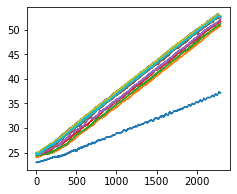

In [151]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3
def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(df_gross, ax, fig, alpha =0.7, scm=None)

In [152]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(df_gross)
df_nrm = pd.DataFrame(df_nrm)
df_nrm.columns = df_gross.columns
#df_nrm.shape

In [153]:
df_nrm

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,-1.000000,-1.000000,-1.000000,-1.000000,-0.992657,-0.987945,-0.988061,-0.985760,-0.983282,-0.980825
1,-0.995272,-0.994940,-1.000000,-1.000000,-0.995102,-0.995174,-0.988061,-0.988133,-0.990448,-0.985623
2,-1.000000,-0.992410,-1.000000,-1.000000,-0.995102,-0.985528,-0.988061,-0.988133,-0.992841,-0.990413
3,-1.000000,-0.994940,-1.000000,-1.000000,-0.995102,-0.975883,-0.988061,-0.988133,-0.988061,-0.992808
4,-1.000000,-0.994940,-1.000000,-1.000000,-0.995102,-0.992764,-0.988061,-0.990505,-0.990448,-0.988018
...,...,...,...,...,...,...,...,...,...,...
2295,0.971504,0.994895,0.994915,0.994941,0.997533,0.985407,0.963879,0.954516,0.975918,0.985502
2296,0.971504,1.000000,0.997458,1.000000,0.997533,0.982976,0.963879,0.954516,0.973511,0.983086
2297,0.971504,0.997448,0.997458,0.997471,0.997533,0.987838,0.966287,0.959302,0.975918,0.983086
2298,0.971504,1.000000,1.000000,0.997471,1.000000,0.990276,0.966287,0.956909,0.973511,0.983086


In [154]:

#######################################
# prepare functions for ANN
# by flattning k rows to one table row (input for sample)
# and generating the corresponding next line (y)
#######################################

"""
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
X, y = prepare_df(df)

last row is last y
X doesn't contain last row and begins from first row!
"""

def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys



In [155]:
k = 3
epochs =10000
batch_size = 1000
n_features = 10
#n_features = 10 is 10 when, input in 10 columns temperature

In [156]:

Xdf1, ydf1 = prepare_df(df_nrm)

#Xdf2, ydf2 = prepare_df(y)
Xdf1.shape

(2297, 30)

In [157]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)

    #plt.legend(loc='upper left')
    return fig, ax


In [158]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [159]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.1, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [160]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [173]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(16, input_shape = (time_steps, n_features), kernel_regularizer=l2(0.01), \
                   recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    #model.add(LSTM(64))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [174]:
model = create_model(k, n_features)
model_fpath=modelDir(ModelName='OnlyTemTForGitFigures.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_accuracy",
                                   save_best_only=True,
                           
                                   mode="min")]

In [175]:
X_train.shape
y_train.shape

(2067, 10)

In [176]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], n_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)
ax.legend(bbox_to_anchor=(0.5,0.8))

Train on 1446 samples, validate on 621 samples
Epoch 1/10000
1446/1446 [==============================] - 1s 831us/step - loss: 0.8961 - accuracy: 0.0505 - val_loss: 1.1301 - val_accuracy: 0.0064
Epoch 2/10000
1446/1446 [==============================] - 0s 50us/step - loss: 0.8704 - accuracy: 0.0367 - val_loss: 1.1121 - val_accuracy: 0.0064
Epoch 3/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.8460 - accuracy: 0.0567 - val_loss: 1.0941 - val_accuracy: 0.0064
Epoch 4/10000
1446/1446 [==============================] - 0s 46us/step - loss: 0.8242 - accuracy: 0.0470 - val_loss: 1.0763 - val_accuracy: 0.0064
Epoch 5/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.8017 - accuracy: 0.0470 - val_loss: 1.0585 - val_accuracy: 0.0064
Epoch 6/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.7825 - accuracy: 0.0470 - val_loss: 1.0409 - val_accuracy: 0.0064
Epoch 7/10000
1446/1446 [==============================] - 0s 22

Epoch 56/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.2996 - accuracy: 0.1404 - val_loss: 0.4931 - val_accuracy: 0.0016
Epoch 57/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.2959 - accuracy: 0.1480 - val_loss: 0.4865 - val_accuracy: 0.0016
Epoch 58/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.2923 - accuracy: 0.1466 - val_loss: 0.4800 - val_accuracy: 0.0016
Epoch 59/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.2876 - accuracy: 0.1604 - val_loss: 0.4736 - val_accuracy: 0.0016
Epoch 60/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.2860 - accuracy: 0.1501 - val_loss: 0.4673 - val_accuracy: 0.0016
Epoch 61/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.2808 - accuracy: 0.1639 - val_loss: 0.4611 - val_accuracy: 0.0016
Epoch 62/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.2784 - accuracy: 0.1521

Epoch 111/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.1716 - accuracy: 0.1798 - val_loss: 0.2614 - val_accuracy: 0.3317
Epoch 112/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.1709 - accuracy: 0.1964 - val_loss: 0.2591 - val_accuracy: 0.3317
Epoch 113/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.1706 - accuracy: 0.2095 - val_loss: 0.2567 - val_accuracy: 0.3317
Epoch 114/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.1677 - accuracy: 0.1936 - val_loss: 0.2544 - val_accuracy: 0.3317
Epoch 115/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.1660 - accuracy: 0.1929 - val_loss: 0.2521 - val_accuracy: 0.3317
Epoch 116/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.1667 - accuracy: 0.2144 - val_loss: 0.2498 - val_accuracy: 0.3317
Epoch 117/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.1651 - accuracy:

Epoch 220/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0875 - accuracy: 0.2835 - val_loss: 0.1314 - val_accuracy: 0.3317
Epoch 221/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0874 - accuracy: 0.2766 - val_loss: 0.1308 - val_accuracy: 0.3317
Epoch 222/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0862 - accuracy: 0.2697 - val_loss: 0.1301 - val_accuracy: 0.3317
Epoch 223/10000
1446/1446 [==============================] - 0s 47us/step - loss: 0.0849 - accuracy: 0.2884 - val_loss: 0.1295 - val_accuracy: 0.3317
Epoch 224/10000
1446/1446 [==============================] - 0s 48us/step - loss: 0.0858 - accuracy: 0.2752 - val_loss: 0.1288 - val_accuracy: 0.3317
Epoch 225/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0860 - accuracy: 0.2600 - val_loss: 0.1280 - val_accuracy: 0.3317
Epoch 226/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0841 - accuracy:

Epoch 329/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0516 - accuracy: 0.3147 - val_loss: 0.0817 - val_accuracy: 0.3317
Epoch 330/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0506 - accuracy: 0.3437 - val_loss: 0.0814 - val_accuracy: 0.3317
Epoch 331/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0506 - accuracy: 0.3271 - val_loss: 0.0810 - val_accuracy: 0.3317
Epoch 332/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0504 - accuracy: 0.3160 - val_loss: 0.0806 - val_accuracy: 0.3317
Epoch 333/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0504 - accuracy: 0.3181 - val_loss: 0.0802 - val_accuracy: 0.3317
Epoch 334/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0499 - accuracy: 0.3271 - val_loss: 0.0798 - val_accuracy: 0.3317
Epoch 335/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0491 - accuracy:

Epoch 438/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0315 - accuracy: 0.3728 - val_loss: 0.0538 - val_accuracy: 0.3317
Epoch 439/10000
1446/1446 [==============================] - 0s 51us/step - loss: 0.0314 - accuracy: 0.3617 - val_loss: 0.0534 - val_accuracy: 0.3317
Epoch 440/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0310 - accuracy: 0.3893 - val_loss: 0.0530 - val_accuracy: 0.3317
Epoch 441/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0313 - accuracy: 0.3645 - val_loss: 0.0526 - val_accuracy: 0.3317
Epoch 442/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0306 - accuracy: 0.3541 - val_loss: 0.0524 - val_accuracy: 0.3317
Epoch 443/10000
1446/1446 [==============================] - 0s 44us/step - loss: 0.0304 - accuracy: 0.3714 - val_loss: 0.0523 - val_accuracy: 0.3317
Epoch 444/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0299 - accuracy:

Epoch 547/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0205 - accuracy: 0.3928 - val_loss: 0.0382 - val_accuracy: 0.3317
Epoch 548/10000
1446/1446 [==============================] - 0s 41us/step - loss: 0.0200 - accuracy: 0.4032 - val_loss: 0.0379 - val_accuracy: 0.3317
Epoch 549/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0201 - accuracy: 0.3914 - val_loss: 0.0376 - val_accuracy: 0.3317
Epoch 550/10000
1446/1446 [==============================] - 0s 54us/step - loss: 0.0193 - accuracy: 0.3928 - val_loss: 0.0374 - val_accuracy: 0.3317
Epoch 551/10000
1446/1446 [==============================] - 0s 44us/step - loss: 0.0204 - accuracy: 0.4080 - val_loss: 0.0374 - val_accuracy: 0.3317
Epoch 552/10000
1446/1446 [==============================] - 0s 41us/step - loss: 0.0199 - accuracy: 0.3631 - val_loss: 0.0373 - val_accuracy: 0.3317
Epoch 553/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0192 - accuracy:

Epoch 656/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0146 - accuracy: 0.4094 - val_loss: 0.0294 - val_accuracy: 0.3317
Epoch 657/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0145 - accuracy: 0.4156 - val_loss: 0.0291 - val_accuracy: 0.3317
Epoch 658/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0142 - accuracy: 0.4011 - val_loss: 0.0290 - val_accuracy: 0.3317
Epoch 659/10000
1446/1446 [==============================] - 0s 48us/step - loss: 0.0142 - accuracy: 0.3990 - val_loss: 0.0292 - val_accuracy: 0.3317
Epoch 660/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0143 - accuracy: 0.4322 - val_loss: 0.0293 - val_accuracy: 0.3317
Epoch 661/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0142 - accuracy: 0.4412 - val_loss: 0.0297 - val_accuracy: 0.3317
Epoch 662/10000
1446/1446 [==============================] - 0s 42us/step - loss: 0.0142 - accuracy:

Epoch 765/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0115 - accuracy: 0.4350 - val_loss: 0.0229 - val_accuracy: 0.3317
Epoch 766/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0116 - accuracy: 0.4274 - val_loss: 0.0235 - val_accuracy: 0.3317
Epoch 767/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0118 - accuracy: 0.4454 - val_loss: 0.0237 - val_accuracy: 0.3317
Epoch 768/10000
1446/1446 [==============================] - 0s 42us/step - loss: 0.0112 - accuracy: 0.4246 - val_loss: 0.0237 - val_accuracy: 0.3317
Epoch 769/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0114 - accuracy: 0.4302 - val_loss: 0.0238 - val_accuracy: 0.3317
Epoch 770/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0113 - accuracy: 0.4723 - val_loss: 0.0240 - val_accuracy: 0.3317
Epoch 771/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0117 - accuracy:

Epoch 874/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0102 - accuracy: 0.4945 - val_loss: 0.0196 - val_accuracy: 0.3317
Epoch 875/10000
1446/1446 [==============================] - 0s 54us/step - loss: 0.0106 - accuracy: 0.4903 - val_loss: 0.0206 - val_accuracy: 0.3317
Epoch 876/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0099 - accuracy: 0.4855 - val_loss: 0.0210 - val_accuracy: 0.3317
Epoch 877/10000
1446/1446 [==============================] - 0s 48us/step - loss: 0.0105 - accuracy: 0.4862 - val_loss: 0.0206 - val_accuracy: 0.3317
Epoch 878/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0109 - accuracy: 0.4647 - val_loss: 0.0197 - val_accuracy: 0.3317
Epoch 879/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0100 - accuracy: 0.4952 - val_loss: 0.0193 - val_accuracy: 0.3317
Epoch 880/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0109 - accuracy:

Epoch 983/10000
1446/1446 [==============================] - 0s 53us/step - loss: 0.0098 - accuracy: 0.5111 - val_loss: 0.0179 - val_accuracy: 0.3317
Epoch 984/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0096 - accuracy: 0.5000 - val_loss: 0.0175 - val_accuracy: 0.3317
Epoch 985/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0094 - accuracy: 0.4723 - val_loss: 0.0174 - val_accuracy: 0.3317
Epoch 986/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0094 - accuracy: 0.4730 - val_loss: 0.0176 - val_accuracy: 0.3317
Epoch 987/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0094 - accuracy: 0.4793 - val_loss: 0.0181 - val_accuracy: 0.3317
Epoch 988/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0094 - accuracy: 0.4938 - val_loss: 0.0185 - val_accuracy: 0.3317
Epoch 989/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0091 - accuracy:

1446/1446 [==============================] - 0s 54us/step - loss: 0.0088 - accuracy: 0.5069 - val_loss: 0.0162 - val_accuracy: 0.3317
Epoch 1092/10000
1446/1446 [==============================] - 0s 53us/step - loss: 0.0086 - accuracy: 0.5235 - val_loss: 0.0161 - val_accuracy: 0.3317
Epoch 1093/10000
1446/1446 [==============================] - 0s 55us/step - loss: 0.0084 - accuracy: 0.5512 - val_loss: 0.0163 - val_accuracy: 0.3317
Epoch 1094/10000
1446/1446 [==============================] - 0s 63us/step - loss: 0.0095 - accuracy: 0.5318 - val_loss: 0.0161 - val_accuracy: 0.3317
Epoch 1095/10000
1446/1446 [==============================] - 0s 40us/step - loss: 0.0093 - accuracy: 0.5159 - val_loss: 0.0158 - val_accuracy: 0.3317
Epoch 1096/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0087 - accuracy: 0.5214 - val_loss: 0.0154 - val_accuracy: 0.3317
Epoch 1097/10000
1446/1446 [==============================] - 0s 57us/step - loss: 0.0091 - accuracy: 0.5062 - 

1446/1446 [==============================] - 0s 37us/step - loss: 0.0086 - accuracy: 0.5076 - val_loss: 0.0161 - val_accuracy: 0.3317
Epoch 1200/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0095 - accuracy: 0.4938 - val_loss: 0.0150 - val_accuracy: 0.3317
Epoch 1201/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0081 - accuracy: 0.4841 - val_loss: 0.0139 - val_accuracy: 0.3317
Epoch 1202/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0086 - accuracy: 0.5235 - val_loss: 0.0140 - val_accuracy: 0.3317
Epoch 1203/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0085 - accuracy: 0.5194 - val_loss: 0.0143 - val_accuracy: 0.3317
Epoch 1204/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0090 - accuracy: 0.5048 - val_loss: 0.0138 - val_accuracy: 0.3317
Epoch 1205/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0088 - accuracy: 0.5014 - 

1446/1446 [==============================] - 0s 27us/step - loss: 0.0083 - accuracy: 0.4834 - val_loss: 0.0136 - val_accuracy: 0.3317
Epoch 1308/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0079 - accuracy: 0.5014 - val_loss: 0.0142 - val_accuracy: 0.3317
Epoch 1309/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0086 - accuracy: 0.5131 - val_loss: 0.0151 - val_accuracy: 0.3317
Epoch 1310/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0079 - accuracy: 0.4917 - val_loss: 0.0153 - val_accuracy: 0.3317
Epoch 1311/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0088 - accuracy: 0.5083 - val_loss: 0.0149 - val_accuracy: 0.3317
Epoch 1312/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0084 - accuracy: 0.5387 - val_loss: 0.0139 - val_accuracy: 0.3317
Epoch 1313/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0088 - accuracy: 0.5339 - 

1446/1446 [==============================] - 0s 18us/step - loss: 0.0080 - accuracy: 0.5297 - val_loss: 0.0118 - val_accuracy: 0.3317
Epoch 1416/10000
1446/1446 [==============================] - 0s 16us/step - loss: 0.0082 - accuracy: 0.5533 - val_loss: 0.0117 - val_accuracy: 0.3317
Epoch 1417/10000
1446/1446 [==============================] - 0s 17us/step - loss: 0.0085 - accuracy: 0.5588 - val_loss: 0.0115 - val_accuracy: 0.3317
Epoch 1418/10000
1446/1446 [==============================] - 0s 19us/step - loss: 0.0074 - accuracy: 0.5595 - val_loss: 0.0116 - val_accuracy: 0.3317
Epoch 1419/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0081 - accuracy: 0.5636 - val_loss: 0.0121 - val_accuracy: 0.3317
Epoch 1420/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0080 - accuracy: 0.5387 - val_loss: 0.0131 - val_accuracy: 0.3317
Epoch 1421/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0087 - accuracy: 0.5788 - 

1446/1446 [==============================] - 0s 23us/step - loss: 0.0077 - accuracy: 0.5256 - val_loss: 0.0108 - val_accuracy: 0.3317
Epoch 1524/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0074 - accuracy: 0.5249 - val_loss: 0.0113 - val_accuracy: 0.3317
Epoch 1525/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0074 - accuracy: 0.5221 - val_loss: 0.0112 - val_accuracy: 0.3317
Epoch 1526/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0076 - accuracy: 0.4993 - val_loss: 0.0113 - val_accuracy: 0.3317
Epoch 1527/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0077 - accuracy: 0.5048 - val_loss: 0.0120 - val_accuracy: 0.3317
Epoch 1528/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0076 - accuracy: 0.5456 - val_loss: 0.0128 - val_accuracy: 0.3317
Epoch 1529/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0080 - accuracy: 0.5221 - 

1446/1446 [==============================] - 0s 24us/step - loss: 0.0071 - accuracy: 0.5698 - val_loss: 0.0104 - val_accuracy: 0.4074
Epoch 1632/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0073 - accuracy: 0.5297 - val_loss: 0.0107 - val_accuracy: 0.4267
Epoch 1633/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0075 - accuracy: 0.5311 - val_loss: 0.0105 - val_accuracy: 0.4396
Epoch 1634/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0073 - accuracy: 0.5408 - val_loss: 0.0102 - val_accuracy: 0.4122
Epoch 1635/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0077 - accuracy: 0.5360 - val_loss: 0.0096 - val_accuracy: 0.3688
Epoch 1636/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0074 - accuracy: 0.5823 - val_loss: 0.0102 - val_accuracy: 0.3688
Epoch 1637/10000
1446/1446 [==============================] - 0s 52us/step - loss: 0.0074 - accuracy: 0.5609 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0072 - accuracy: 0.5851 - val_loss: 0.0092 - val_accuracy: 0.3317
Epoch 1740/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0076 - accuracy: 0.6155 - val_loss: 0.0098 - val_accuracy: 0.3317
Epoch 1741/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0074 - accuracy: 0.5982 - val_loss: 0.0092 - val_accuracy: 0.3317
Epoch 1742/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0069 - accuracy: 0.5650 - val_loss: 0.0076 - val_accuracy: 0.3317
Epoch 1743/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0074 - accuracy: 0.5754 - val_loss: 0.0076 - val_accuracy: 0.3317
Epoch 1744/10000
1446/1446 [==============================] - 0s 42us/step - loss: 0.0071 - accuracy: 0.5574 - val_loss: 0.0096 - val_accuracy: 0.3317
Epoch 1745/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0073 - accuracy: 0.5519 - 

1446/1446 [==============================] - 0s 24us/step - loss: 0.0073 - accuracy: 0.5761 - val_loss: 0.0064 - val_accuracy: 0.3317
Epoch 1848/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0073 - accuracy: 0.6037 - val_loss: 0.0084 - val_accuracy: 0.3317
Epoch 1849/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0070 - accuracy: 0.6058 - val_loss: 0.0107 - val_accuracy: 0.3317
Epoch 1850/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0074 - accuracy: 0.5934 - val_loss: 0.0098 - val_accuracy: 0.3317
Epoch 1851/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0072 - accuracy: 0.5851 - val_loss: 0.0076 - val_accuracy: 0.3317
Epoch 1852/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0079 - accuracy: 0.5996 - val_loss: 0.0076 - val_accuracy: 0.3317
Epoch 1853/10000
1446/1446 [==============================] - 0s 20us/step - loss: 0.0071 - accuracy: 0.5892 - 

1446/1446 [==============================] - 0s 25us/step - loss: 0.0069 - accuracy: 0.6141 - val_loss: 0.0076 - val_accuracy: 0.4348
Epoch 1956/10000
1446/1446 [==============================] - 0s 17us/step - loss: 0.0071 - accuracy: 0.6404 - val_loss: 0.0077 - val_accuracy: 0.4122
Epoch 1957/10000
1446/1446 [==============================] - 0s 19us/step - loss: 0.0064 - accuracy: 0.6003 - val_loss: 0.0074 - val_accuracy: 0.3913
Epoch 1958/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0079 - accuracy: 0.6307 - val_loss: 0.0073 - val_accuracy: 0.3720
Epoch 1959/10000
1446/1446 [==============================] - 0s 20us/step - loss: 0.0070 - accuracy: 0.6245 - val_loss: 0.0078 - val_accuracy: 0.3688
Epoch 1960/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0067 - accuracy: 0.6072 - val_loss: 0.0081 - val_accuracy: 0.3639
Epoch 1961/10000
1446/1446 [==============================] - 0s 40us/step - loss: 0.0068 - accuracy: 0.5761 - 

1446/1446 [==============================] - 0s 46us/step - loss: 0.0069 - accuracy: 0.5858 - val_loss: 0.0075 - val_accuracy: 0.3591
Epoch 2064/10000
1446/1446 [==============================] - 0s 47us/step - loss: 0.0065 - accuracy: 0.6113 - val_loss: 0.0066 - val_accuracy: 0.3317
Epoch 2065/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0067 - accuracy: 0.6079 - val_loss: 0.0072 - val_accuracy: 0.3349
Epoch 2066/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0067 - accuracy: 0.6017 - val_loss: 0.0090 - val_accuracy: 0.3704
Epoch 2067/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0069 - accuracy: 0.6238 - val_loss: 0.0092 - val_accuracy: 0.3704
Epoch 2068/10000
1446/1446 [==============================] - 0s 40us/step - loss: 0.0069 - accuracy: 0.6266 - val_loss: 0.0077 - val_accuracy: 0.3655
Epoch 2069/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0070 - accuracy: 0.6321 - 

1446/1446 [==============================] - 0s 22us/step - loss: 0.0070 - accuracy: 0.6286 - val_loss: 0.0074 - val_accuracy: 0.4316
Epoch 2172/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0067 - accuracy: 0.6286 - val_loss: 0.0055 - val_accuracy: 0.4010
Epoch 2173/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0064 - accuracy: 0.6210 - val_loss: 0.0056 - val_accuracy: 0.3784
Epoch 2174/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0070 - accuracy: 0.6266 - val_loss: 0.0070 - val_accuracy: 0.4187
Epoch 2175/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0068 - accuracy: 0.6272 - val_loss: 0.0070 - val_accuracy: 0.4122
Epoch 2176/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0068 - accuracy: 0.6044 - val_loss: 0.0060 - val_accuracy: 0.4122
Epoch 2177/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0072 - accuracy: 0.6120 - 

1446/1446 [==============================] - 0s 41us/step - loss: 0.0063 - accuracy: 0.6480 - val_loss: 0.0073 - val_accuracy: 0.6232
Epoch 2280/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0064 - accuracy: 0.6542 - val_loss: 0.0074 - val_accuracy: 0.6087
Epoch 2281/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0065 - accuracy: 0.6404 - val_loss: 0.0066 - val_accuracy: 0.5942
Epoch 2282/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0065 - accuracy: 0.6452 - val_loss: 0.0063 - val_accuracy: 0.5620
Epoch 2283/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0062 - accuracy: 0.6355 - val_loss: 0.0066 - val_accuracy: 0.6006
Epoch 2284/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0067 - accuracy: 0.6425 - val_loss: 0.0066 - val_accuracy: 0.5813
Epoch 2285/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0064 - accuracy: 0.6134 - 

1446/1446 [==============================] - 0s 34us/step - loss: 0.0066 - accuracy: 0.6535 - val_loss: 0.0060 - val_accuracy: 0.5539
Epoch 2388/10000
1446/1446 [==============================] - 0s 67us/step - loss: 0.0065 - accuracy: 0.6279 - val_loss: 0.0065 - val_accuracy: 0.6184
Epoch 2389/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0067 - accuracy: 0.6542 - val_loss: 0.0071 - val_accuracy: 0.6184
Epoch 2390/10000
1446/1446 [==============================] - 0s 48us/step - loss: 0.0066 - accuracy: 0.6487 - val_loss: 0.0066 - val_accuracy: 0.6184
Epoch 2391/10000
1446/1446 [==============================] - 0s 49us/step - loss: 0.0060 - accuracy: 0.6694 - val_loss: 0.0062 - val_accuracy: 0.6200
Epoch 2392/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0065 - accuracy: 0.6528 - val_loss: 0.0061 - val_accuracy: 0.5878
Epoch 2393/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0066 - accuracy: 0.6521 - 

1446/1446 [==============================] - 0s 33us/step - loss: 0.0062 - accuracy: 0.6480 - val_loss: 0.0055 - val_accuracy: 0.6264
Epoch 2496/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0062 - accuracy: 0.6501 - val_loss: 0.0062 - val_accuracy: 0.6264
Epoch 2497/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0064 - accuracy: 0.6805 - val_loss: 0.0060 - val_accuracy: 0.6264
Epoch 2498/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0066 - accuracy: 0.6812 - val_loss: 0.0052 - val_accuracy: 0.6264
Epoch 2499/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0063 - accuracy: 0.6812 - val_loss: 0.0057 - val_accuracy: 0.6264
Epoch 2500/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0062 - accuracy: 0.6936 - val_loss: 0.0064 - val_accuracy: 0.6264
Epoch 2501/10000
1446/1446 [==============================] - 0s 41us/step - loss: 0.0062 - accuracy: 0.6777 - 

1446/1446 [==============================] - 0s 24us/step - loss: 0.0064 - accuracy: 0.6895 - val_loss: 0.0060 - val_accuracy: 0.3897
Epoch 2604/10000
1446/1446 [==============================] - 0s 44us/step - loss: 0.0059 - accuracy: 0.6798 - val_loss: 0.0058 - val_accuracy: 0.4026
Epoch 2605/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0064 - accuracy: 0.6881 - val_loss: 0.0054 - val_accuracy: 0.4106
Epoch 2606/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0061 - accuracy: 0.6667 - val_loss: 0.0057 - val_accuracy: 0.4106
Epoch 2607/10000
1446/1446 [==============================] - 0s 48us/step - loss: 0.0063 - accuracy: 0.6715 - val_loss: 0.0061 - val_accuracy: 0.4316
Epoch 2608/10000
1446/1446 [==============================] - 0s 106us/step - loss: 0.0065 - accuracy: 0.6784 - val_loss: 0.0058 - val_accuracy: 0.4300
Epoch 2609/10000
1446/1446 [==============================] - 0s 46us/step - loss: 0.0059 - accuracy: 0.6674 -

1446/1446 [==============================] - 0s 32us/step - loss: 0.0062 - accuracy: 0.6978 - val_loss: 0.0055 - val_accuracy: 0.6264
Epoch 2712/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0057 - accuracy: 0.7006 - val_loss: 0.0048 - val_accuracy: 0.6264
Epoch 2713/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0062 - accuracy: 0.7144 - val_loss: 0.0049 - val_accuracy: 0.6264
Epoch 2714/10000
1446/1446 [==============================] - 0s 53us/step - loss: 0.0061 - accuracy: 0.7012 - val_loss: 0.0051 - val_accuracy: 0.6264
Epoch 2715/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0061 - accuracy: 0.7026 - val_loss: 0.0044 - val_accuracy: 0.6200
Epoch 2716/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0061 - accuracy: 0.7026 - val_loss: 0.0050 - val_accuracy: 0.6184
Epoch 2717/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0061 - accuracy: 0.7102 - 

1446/1446 [==============================] - 0s 64us/step - loss: 0.0060 - accuracy: 0.7172 - val_loss: 0.0044 - val_accuracy: 0.5813
Epoch 2820/10000
1446/1446 [==============================] - 0s 44us/step - loss: 0.0062 - accuracy: 0.7213 - val_loss: 0.0059 - val_accuracy: 0.6216
Epoch 2821/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0058 - accuracy: 0.7248 - val_loss: 0.0053 - val_accuracy: 0.6039
Epoch 2822/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0062 - accuracy: 0.7434 - val_loss: 0.0043 - val_accuracy: 0.5491
Epoch 2823/10000
1446/1446 [==============================] - 0s 59us/step - loss: 0.0061 - accuracy: 0.7165 - val_loss: 0.0041 - val_accuracy: 0.5749
Epoch 2824/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0061 - accuracy: 0.7199 - val_loss: 0.0048 - val_accuracy: 0.5894
Epoch 2825/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0062 - accuracy: 0.7123 - 

1446/1446 [==============================] - 0s 36us/step - loss: 0.0056 - accuracy: 0.7393 - val_loss: 0.0046 - val_accuracy: 0.5765
Epoch 2928/10000
1446/1446 [==============================] - 0s 51us/step - loss: 0.0054 - accuracy: 0.7393 - val_loss: 0.0048 - val_accuracy: 0.5974
Epoch 2929/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0059 - accuracy: 0.7331 - val_loss: 0.0041 - val_accuracy: 0.6151
Epoch 2930/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0058 - accuracy: 0.7344 - val_loss: 0.0035 - val_accuracy: 0.6248
Epoch 2931/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0060 - accuracy: 0.7241 - val_loss: 0.0038 - val_accuracy: 0.6216
Epoch 2932/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0058 - accuracy: 0.7185 - val_loss: 0.0043 - val_accuracy: 0.6216
Epoch 2933/10000
1446/1446 [==============================] - 0s 41us/step - loss: 0.0059 - accuracy: 0.7296 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0061 - accuracy: 0.7331 - val_loss: 0.0067 - val_accuracy: 0.6264
Epoch 3036/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0057 - accuracy: 0.7317 - val_loss: 0.0062 - val_accuracy: 0.6264
Epoch 3037/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0059 - accuracy: 0.7351 - val_loss: 0.0052 - val_accuracy: 0.6264
Epoch 3038/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0057 - accuracy: 0.7303 - val_loss: 0.0043 - val_accuracy: 0.6264
Epoch 3039/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0057 - accuracy: 0.7275 - val_loss: 0.0045 - val_accuracy: 0.6264
Epoch 3040/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0059 - accuracy: 0.7434 - val_loss: 0.0051 - val_accuracy: 0.6264
Epoch 3041/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0058 - accuracy: 0.7420 - 

1446/1446 [==============================] - 0s 20us/step - loss: 0.0057 - accuracy: 0.7490 - val_loss: 0.0047 - val_accuracy: 0.6264
Epoch 3144/10000
1446/1446 [==============================] - 0s 17us/step - loss: 0.0057 - accuracy: 0.7503 - val_loss: 0.0043 - val_accuracy: 0.6264
Epoch 3145/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0058 - accuracy: 0.7621 - val_loss: 0.0045 - val_accuracy: 0.6264
Epoch 3146/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0057 - accuracy: 0.7524 - val_loss: 0.0044 - val_accuracy: 0.6264
Epoch 3147/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0060 - accuracy: 0.7503 - val_loss: 0.0042 - val_accuracy: 0.6264
Epoch 3148/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0058 - accuracy: 0.7448 - val_loss: 0.0047 - val_accuracy: 0.6264
Epoch 3149/10000
1446/1446 [==============================] - 0s 67us/step - loss: 0.0055 - accuracy: 0.7600 - 

1446/1446 [==============================] - 0s 23us/step - loss: 0.0056 - accuracy: 0.7635 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 3252/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0057 - accuracy: 0.7801 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 3253/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0057 - accuracy: 0.7669 - val_loss: 0.0038 - val_accuracy: 0.6264
Epoch 3254/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0058 - accuracy: 0.7759 - val_loss: 0.0037 - val_accuracy: 0.6264
Epoch 3255/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0062 - accuracy: 0.7580 - val_loss: 0.0034 - val_accuracy: 0.6167
Epoch 3256/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0061 - accuracy: 0.7635 - val_loss: 0.0042 - val_accuracy: 0.6216
Epoch 3257/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0057 - accuracy: 0.7683 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0056 - accuracy: 0.7856 - val_loss: 0.0055 - val_accuracy: 0.6264
Epoch 3360/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0064 - accuracy: 0.7856 - val_loss: 0.0044 - val_accuracy: 0.6264
Epoch 3361/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0059 - accuracy: 0.7932 - val_loss: 0.0048 - val_accuracy: 0.6264
Epoch 3362/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0059 - accuracy: 0.7849 - val_loss: 0.0049 - val_accuracy: 0.6264
Epoch 3363/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0052 - accuracy: 0.7822 - val_loss: 0.0048 - val_accuracy: 0.6264
Epoch 3364/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0057 - accuracy: 0.7835 - val_loss: 0.0044 - val_accuracy: 0.6329
Epoch 3365/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0060 - accuracy: 0.7690 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0059 - accuracy: 0.7808 - val_loss: 0.0026 - val_accuracy: 0.6167
Epoch 3468/10000
1446/1446 [==============================] - 0s 48us/step - loss: 0.0058 - accuracy: 0.7808 - val_loss: 0.0034 - val_accuracy: 0.6264
Epoch 3469/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0059 - accuracy: 0.7794 - val_loss: 0.0045 - val_accuracy: 0.6264
Epoch 3470/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0058 - accuracy: 0.7697 - val_loss: 0.0043 - val_accuracy: 0.6264
Epoch 3471/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0054 - accuracy: 0.7697 - val_loss: 0.0039 - val_accuracy: 0.6264
Epoch 3472/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0054 - accuracy: 0.7649 - val_loss: 0.0042 - val_accuracy: 0.6264
Epoch 3473/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0056 - accuracy: 0.7739 - 

1446/1446 [==============================] - 0s 31us/step - loss: 0.0062 - accuracy: 0.8029 - val_loss: 0.0036 - val_accuracy: 0.5942
Epoch 3576/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0056 - accuracy: 0.8133 - val_loss: 0.0044 - val_accuracy: 0.6248
Epoch 3577/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0056 - accuracy: 0.8029 - val_loss: 0.0039 - val_accuracy: 0.5878
Epoch 3578/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0056 - accuracy: 0.7856 - val_loss: 0.0041 - val_accuracy: 0.5620
Epoch 3579/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0055 - accuracy: 0.7953 - val_loss: 0.0046 - val_accuracy: 0.5620
Epoch 3580/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0057 - accuracy: 0.8043 - val_loss: 0.0049 - val_accuracy: 0.5797
Epoch 3581/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0055 - accuracy: 0.7891 - 

1446/1446 [==============================] - 0s 69us/step - loss: 0.0056 - accuracy: 0.8209 - val_loss: 0.0053 - val_accuracy: 0.6264
Epoch 3684/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0059 - accuracy: 0.8119 - val_loss: 0.0037 - val_accuracy: 0.6264
Epoch 3685/10000
1446/1446 [==============================] - 0s 87us/step - loss: 0.0057 - accuracy: 0.8133 - val_loss: 0.0033 - val_accuracy: 0.6264
Epoch 3686/10000
1446/1446 [==============================] - 0s 47us/step - loss: 0.0055 - accuracy: 0.8008 - val_loss: 0.0041 - val_accuracy: 0.6264
Epoch 3687/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0060 - accuracy: 0.8154 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 3688/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0054 - accuracy: 0.8084 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 3689/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0058 - accuracy: 0.8043 - 

1446/1446 [==============================] - 0s 28us/step - loss: 0.0062 - accuracy: 0.8084 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 3792/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0051 - accuracy: 0.8091 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 3793/10000
1446/1446 [==============================] - 0s 44us/step - loss: 0.0055 - accuracy: 0.8098 - val_loss: 0.0043 - val_accuracy: 0.6264
Epoch 3794/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0058 - accuracy: 0.8057 - val_loss: 0.0038 - val_accuracy: 0.6264
Epoch 3795/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0055 - accuracy: 0.8112 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 3796/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0052 - accuracy: 0.8071 - val_loss: 0.0039 - val_accuracy: 0.6264
Epoch 3797/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0056 - accuracy: 0.8133 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0058 - accuracy: 0.8098 - val_loss: 0.0033 - val_accuracy: 0.6264
Epoch 3900/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0054 - accuracy: 0.8209 - val_loss: 0.0033 - val_accuracy: 0.6264
Epoch 3901/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0054 - accuracy: 0.8195 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 3902/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0053 - accuracy: 0.8209 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 3903/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0051 - accuracy: 0.8181 - val_loss: 0.0040 - val_accuracy: 0.6264
Epoch 3904/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0061 - accuracy: 0.8174 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 3905/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0059 - accuracy: 0.8195 - 

1446/1446 [==============================] - 0s 25us/step - loss: 0.0053 - accuracy: 0.8292 - val_loss: 0.0023 - val_accuracy: 0.6103
Epoch 4008/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0055 - accuracy: 0.8368 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 4009/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0054 - accuracy: 0.8278 - val_loss: 0.0039 - val_accuracy: 0.6264
Epoch 4010/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0055 - accuracy: 0.8340 - val_loss: 0.0038 - val_accuracy: 0.6264
Epoch 4011/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0055 - accuracy: 0.8264 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 4012/10000
1446/1446 [==============================] - 0s 20us/step - loss: 0.0057 - accuracy: 0.8271 - val_loss: 0.0034 - val_accuracy: 0.6264
Epoch 4013/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0057 - accuracy: 0.8340 - 

1446/1446 [==============================] - 0s 31us/step - loss: 0.0055 - accuracy: 0.8382 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 4116/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0053 - accuracy: 0.8396 - val_loss: 0.0052 - val_accuracy: 0.6264
Epoch 4117/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0056 - accuracy: 0.8299 - val_loss: 0.0043 - val_accuracy: 0.6264
Epoch 4118/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0055 - accuracy: 0.8451 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 4119/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0054 - accuracy: 0.8472 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 4120/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0052 - accuracy: 0.8437 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 4121/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0053 - accuracy: 0.8444 - 

1446/1446 [==============================] - 0s 36us/step - loss: 0.0053 - accuracy: 0.8423 - val_loss: 0.0037 - val_accuracy: 0.6264
Epoch 4224/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0056 - accuracy: 0.8444 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 4225/10000
1446/1446 [==============================] - 0s 52us/step - loss: 0.0056 - accuracy: 0.8416 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 4226/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0056 - accuracy: 0.8437 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 4227/10000
1446/1446 [==============================] - 0s 51us/step - loss: 0.0053 - accuracy: 0.8347 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 4228/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0051 - accuracy: 0.8430 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 4229/10000
1446/1446 [==============================] - 0s 42us/step - loss: 0.0056 - accuracy: 0.8437 - 

1446/1446 [==============================] - 0s 122us/step - loss: 0.0051 - accuracy: 0.8444 - val_loss: 0.0033 - val_accuracy: 0.6264
Epoch 4332/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0051 - accuracy: 0.8472 - val_loss: 0.0038 - val_accuracy: 0.6264
Epoch 4333/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0055 - accuracy: 0.8451 - val_loss: 0.0040 - val_accuracy: 0.6264
Epoch 4334/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0048 - accuracy: 0.8416 - val_loss: 0.0040 - val_accuracy: 0.6264
Epoch 4335/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0048 - accuracy: 0.8479 - val_loss: 0.0044 - val_accuracy: 0.6264
Epoch 4336/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0053 - accuracy: 0.8423 - val_loss: 0.0033 - val_accuracy: 0.6264
Epoch 4337/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0056 - accuracy: 0.8437 -

1446/1446 [==============================] - 0s 32us/step - loss: 0.0050 - accuracy: 0.8492 - val_loss: 0.0048 - val_accuracy: 0.6264
Epoch 4440/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0052 - accuracy: 0.8492 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 4441/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0057 - accuracy: 0.8485 - val_loss: 0.0033 - val_accuracy: 0.6264
Epoch 4442/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0052 - accuracy: 0.8451 - val_loss: 0.0049 - val_accuracy: 0.6264
Epoch 4443/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0056 - accuracy: 0.8527 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 4444/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0053 - accuracy: 0.8513 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 4445/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0055 - accuracy: 0.8465 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0054 - accuracy: 0.8527 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 4548/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0057 - accuracy: 0.8492 - val_loss: 0.0037 - val_accuracy: 0.6264
Epoch 4549/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0052 - accuracy: 0.8513 - val_loss: 0.0041 - val_accuracy: 0.6264
Epoch 4550/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0054 - accuracy: 0.8485 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 4551/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0055 - accuracy: 0.8458 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 4552/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0052 - accuracy: 0.8485 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 4553/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0054 - accuracy: 0.8513 - 

1446/1446 [==============================] - 0s 34us/step - loss: 0.0053 - accuracy: 0.8506 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 4656/10000
1446/1446 [==============================] - 0s 42us/step - loss: 0.0054 - accuracy: 0.8513 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 4657/10000
1446/1446 [==============================] - 0s 40us/step - loss: 0.0055 - accuracy: 0.8492 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 4658/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0052 - accuracy: 0.8458 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 4659/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0059 - accuracy: 0.8548 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 4660/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0053 - accuracy: 0.8513 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 4661/10000
1446/1446 [==============================] - 0s 19us/step - loss: 0.0056 - accuracy: 0.8492 - 

1446/1446 [==============================] - 0s 28us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 4764/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0056 - accuracy: 0.8527 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 4765/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0054 - accuracy: 0.8555 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 4766/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0055 - accuracy: 0.8520 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 4767/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0053 - accuracy: 0.8520 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 4768/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0057 - accuracy: 0.8527 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 4769/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0053 - accuracy: 0.8541 - 

1446/1446 [==============================] - 0s 43us/step - loss: 0.0050 - accuracy: 0.8513 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 4872/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0052 - accuracy: 0.8513 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 4873/10000
1446/1446 [==============================] - 0s 50us/step - loss: 0.0052 - accuracy: 0.8520 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 4874/10000
1446/1446 [==============================] - 0s 57us/step - loss: 0.0051 - accuracy: 0.8527 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 4875/10000
1446/1446 [==============================] - 0s 44us/step - loss: 0.0055 - accuracy: 0.8513 - val_loss: 0.0045 - val_accuracy: 0.6264
Epoch 4876/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0056 - accuracy: 0.8541 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 4877/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0052 - accuracy: 0.8520 - 

1446/1446 [==============================] - 0s 36us/step - loss: 0.0055 - accuracy: 0.8541 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 4980/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0049 - accuracy: 0.8527 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 4981/10000
1446/1446 [==============================] - 0s 46us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 4982/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0052 - accuracy: 0.8520 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 4983/10000
1446/1446 [==============================] - 0s 40us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 4984/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 4985/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0051 - accuracy: 0.8527 - 

1446/1446 [==============================] - 0s 37us/step - loss: 0.0056 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5088/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0034 - val_accuracy: 0.6264
Epoch 5089/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 5090/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0016 - val_accuracy: 0.6264
Epoch 5091/10000
1446/1446 [==============================] - 0s 44us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 5092/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 5093/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0052 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 53us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 5196/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0015 - val_accuracy: 0.6264
Epoch 5197/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 5198/10000
1446/1446 [==============================] - 0s 50us/step - loss: 0.0058 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 5199/10000
1446/1446 [==============================] - 0s 79us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 5200/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0056 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5201/10000
1446/1446 [==============================] - 0s 48us/step - loss: 0.0058 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 46us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 5304/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 5305/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 5306/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5307/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 5308/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 5309/10000
1446/1446 [==============================] - 0s 55us/step - loss: 0.0049 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 25us/step - loss: 0.0056 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 5412/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5413/10000
1446/1446 [==============================] - 0s 47us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 5414/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5415/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 5416/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0016 - val_accuracy: 0.6264
Epoch 5417/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0052 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 37us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 5520/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 5521/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5522/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 5523/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 5524/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0045 - accuracy: 0.8534 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 5525/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0050 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 39us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 5628/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0015 - val_accuracy: 0.6264
Epoch 5629/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 5630/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 5631/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 5632/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 5633/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0051 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 24us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5736/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 5737/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 5738/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 5739/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5740/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 5741/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0053 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 35us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 5844/10000
1446/1446 [==============================] - 0s 47us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 5845/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 5846/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 5847/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0033 - val_accuracy: 0.6264
Epoch 5848/10000
1446/1446 [==============================] - 0s 19us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 5849/10000
1446/1446 [==============================] - 0s 19us/step - loss: 0.0052 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 22us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 5952/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 5953/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 5954/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5955/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 5956/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 5957/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0051 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 23us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 6060/10000
1446/1446 [==============================] - 0s 50us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 6061/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 6062/10000
1446/1446 [==============================] - 0s 40us/step - loss: 0.0056 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 6063/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 6064/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 6065/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0050 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 27us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 6168/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 6169/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 6170/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0046 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 6171/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 6172/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 6173/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0052 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 28us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 6276/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 6277/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 6278/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 6279/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 6280/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 6281/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0054 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 43us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 6384/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 6385/10000
1446/1446 [==============================] - 0s 44us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 6386/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 6387/10000
1446/1446 [==============================] - 0s 59us/step - loss: 0.0057 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 6388/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 6389/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0049 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 29us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0033 - val_accuracy: 0.6264
Epoch 6492/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 6493/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 6494/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 6495/10000
1446/1446 [==============================] - 0s 49us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0013 - val_accuracy: 0.6264
Epoch 6496/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 6497/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0053 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0016 - val_accuracy: 0.6264
Epoch 6600/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 6601/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 6602/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0015 - val_accuracy: 0.6264
Epoch 6603/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 6604/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 6605/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0051 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 24us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 6708/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 6709/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 6710/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0011 - val_accuracy: 0.6264
Epoch 6711/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 6712/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0056 - accuracy: 0.8534 - val_loss: 0.0037 - val_accuracy: 0.6264
Epoch 6713/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0051 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 27us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 6816/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 6817/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 6818/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 6819/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 6820/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 6821/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0054 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 28us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0013 - val_accuracy: 0.6264
Epoch 6924/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 6925/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 6926/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0016 - val_accuracy: 0.6264
Epoch 6927/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 6928/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0056 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 6929/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0047 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 31us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 7032/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 7033/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 7034/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 7035/10000
1446/1446 [==============================] - 0s 45us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 7036/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0014 - val_accuracy: 0.6264
Epoch 7037/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0048 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 41us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 7140/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0034 - val_accuracy: 0.6264
Epoch 7141/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0034 - val_accuracy: 0.6264
Epoch 7142/10000
1446/1446 [==============================] - 0s 95us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 7143/10000
1446/1446 [==============================] - 0s 48us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 7144/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 7145/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0048 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 58us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 7248/10000
1446/1446 [==============================] - 0s 43us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 7249/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0045 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 7250/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 7251/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 7252/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 7253/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0049 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 23us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 7356/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 7357/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 7358/10000
1446/1446 [==============================] - 0s 19us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 7359/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 7360/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 7361/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0050 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 22us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 7464/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 7465/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0028 - val_accuracy: 0.6264
Epoch 7466/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 7467/10000
1446/1446 [==============================] - 0s 42us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 7468/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 7469/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0049 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 24us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0013 - val_accuracy: 0.6264
Epoch 7572/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 7573/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 7574/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 7575/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 7576/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 7577/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0050 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 49us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 7680/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 7681/10000
1446/1446 [==============================] - 0s 63us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 7682/10000
1446/1446 [==============================] - 0s 82us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 7683/10000
1446/1446 [==============================] - 0s 62us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 7684/10000
1446/1446 [==============================] - 0s 66us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 7685/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0049 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 45us/step - loss: 0.0045 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 7788/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 7789/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 7790/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 7791/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 7792/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 7793/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0051 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 24us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 7896/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 7897/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0039 - val_accuracy: 0.6264
Epoch 7898/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0040 - val_accuracy: 0.6264
Epoch 7899/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 7900/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 7901/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0052 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 27us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 8004/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 8005/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 8006/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 8007/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 8008/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 8009/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0051 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 30us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 8112/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 8113/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 8114/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 8115/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 8116/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 8117/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0050 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 20us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 8220/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 8221/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 8222/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0016 - val_accuracy: 0.6264
Epoch 8223/10000
1446/1446 [==============================] - 0s 20us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 8224/10000
1446/1446 [==============================] - 0s 20us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0014 - val_accuracy: 0.6264
Epoch 8225/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0056 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 25us/step - loss: 0.0057 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 8328/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0034 - val_accuracy: 0.6264
Epoch 8329/10000
1446/1446 [==============================] - 0s 38us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0015 - val_accuracy: 0.6264
Epoch 8330/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0057 - accuracy: 0.8534 - val_loss: 0.0013 - val_accuracy: 0.6264
Epoch 8331/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 8332/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0014 - val_accuracy: 0.6264
Epoch 8333/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0055 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 23us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 8436/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0046 - accuracy: 0.8534 - val_loss: 0.0039 - val_accuracy: 0.6264
Epoch 8437/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 8438/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0046 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 8439/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 8440/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0015 - val_accuracy: 0.6264
Epoch 8441/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0052 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 33us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 8544/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 8545/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0012 - val_accuracy: 0.6264
Epoch 8546/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 8547/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 8548/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0015 - val_accuracy: 0.6264
Epoch 8549/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0051 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 28us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 8652/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 8653/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 8654/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 8655/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 8656/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 8657/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0050 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 19us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 8760/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0016 - val_accuracy: 0.6264
Epoch 8761/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 8762/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 8763/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 8764/10000
1446/1446 [==============================] - 0s 21us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 8765/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0048 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 8868/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0015 - val_accuracy: 0.6264
Epoch 8869/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0045 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 8870/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0043 - val_accuracy: 0.6264
Epoch 8871/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0042 - val_accuracy: 0.6264
Epoch 8872/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0035 - val_accuracy: 0.6264
Epoch 8873/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0050 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 27us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 8976/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 8977/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 8978/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 8979/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 8980/10000
1446/1446 [==============================] - 0s 28us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 8981/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0054 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 31us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 9084/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0011 - val_accuracy: 0.6264
Epoch 9085/10000
1446/1446 [==============================] - 0s 46us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 9086/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 9087/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0012 - val_accuracy: 0.6264
Epoch 9088/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 9089/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0050 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 21us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 9192/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 9193/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 9194/10000
1446/1446 [==============================] - 0s 17us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0048 - val_accuracy: 0.6264
Epoch 9195/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 9196/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0014 - val_accuracy: 0.6264
Epoch 9197/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0052 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 25us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 9300/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0030 - val_accuracy: 0.6264
Epoch 9301/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0029 - val_accuracy: 0.6264
Epoch 9302/10000
1446/1446 [==============================] - 0s 30us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 9303/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 9304/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 9305/10000
1446/1446 [==============================] - 0s 25us/step - loss: 0.0049 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 43us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0031 - val_accuracy: 0.6264
Epoch 9408/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 9409/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 9410/10000
1446/1446 [==============================] - 0s 32us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0016 - val_accuracy: 0.6264
Epoch 9411/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 9412/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0056 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 9413/10000
1446/1446 [==============================] - 0s 37us/step - loss: 0.0053 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0025 - val_accuracy: 0.6264
Epoch 9516/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 9517/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0015 - val_accuracy: 0.6264
Epoch 9518/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 9519/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 9520/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0046 - accuracy: 0.8534 - val_loss: 0.0013 - val_accuracy: 0.6264
Epoch 9521/10000
1446/1446 [==============================] - 0s 18us/step - loss: 0.0049 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 33us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 9624/10000
1446/1446 [==============================] - 0s 41us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0024 - val_accuracy: 0.6264
Epoch 9625/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 9626/10000
1446/1446 [==============================] - 0s 47us/step - loss: 0.0055 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 9627/10000
1446/1446 [==============================] - 0s 42us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 9628/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0027 - val_accuracy: 0.6264
Epoch 9629/10000
1446/1446 [==============================] - 0s 26us/step - loss: 0.0053 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 48us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 9732/10000
1446/1446 [==============================] - 0s 40us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0019 - val_accuracy: 0.6264
Epoch 9733/10000
1446/1446 [==============================] - 0s 39us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 9734/10000
1446/1446 [==============================] - 0s 46us/step - loss: 0.0052 - accuracy: 0.8534 - val_loss: 0.0014 - val_accuracy: 0.6264
Epoch 9735/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 9736/10000
1446/1446 [==============================] - 0s 33us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 9737/10000
1446/1446 [==============================] - 0s 47us/step - loss: 0.0047 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 45us/step - loss: 0.0050 - accuracy: 0.8534 - val_loss: 0.0014 - val_accuracy: 0.6264
Epoch 9840/10000
1446/1446 [==============================] - 0s 34us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0018 - val_accuracy: 0.6264
Epoch 9841/10000
1446/1446 [==============================] - 0s 31us/step - loss: 0.0047 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 9842/10000
1446/1446 [==============================] - 0s 63us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0023 - val_accuracy: 0.6264
Epoch 9843/10000
1446/1446 [==============================] - 0s 36us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0026 - val_accuracy: 0.6264
Epoch 9844/10000
1446/1446 [==============================] - 0s 35us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0022 - val_accuracy: 0.6264
Epoch 9845/10000
1446/1446 [==============================] - 0s 46us/step - loss: 0.0052 - accuracy: 0.8534 - 

1446/1446 [==============================] - 0s 26us/step - loss: 0.0048 - accuracy: 0.8534 - val_loss: 0.0032 - val_accuracy: 0.6264
Epoch 9948/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0049 - accuracy: 0.8534 - val_loss: 0.0021 - val_accuracy: 0.6264
Epoch 9949/10000
1446/1446 [==============================] - 0s 24us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0017 - val_accuracy: 0.6264
Epoch 9950/10000
1446/1446 [==============================] - 0s 22us/step - loss: 0.0051 - accuracy: 0.8534 - val_loss: 0.0020 - val_accuracy: 0.6264
Epoch 9951/10000
1446/1446 [==============================] - 0s 23us/step - loss: 0.0053 - accuracy: 0.8534 - val_loss: 0.0012 - val_accuracy: 0.6264
Epoch 9952/10000
1446/1446 [==============================] - 0s 29us/step - loss: 0.0054 - accuracy: 0.8534 - val_loss: 0.0014 - val_accuracy: 0.6264
Epoch 9953/10000
1446/1446 [==============================] - 0s 27us/step - loss: 0.0053 - accuracy: 0.8534 - 

No handles with labels found to put in legend.


In [177]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


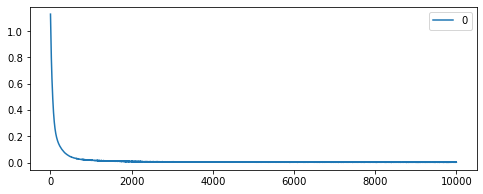

In [178]:
#val_loss = eval_metric(model, history.history, 'loss')
metric = history.history['loss']
val_metric = history.history['val_' + 'loss']

pd.DataFrame(val_metric).plot()

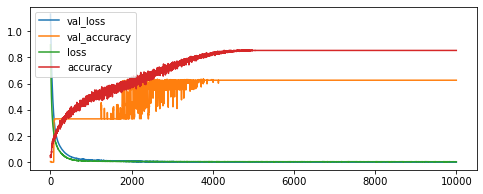

In [179]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()

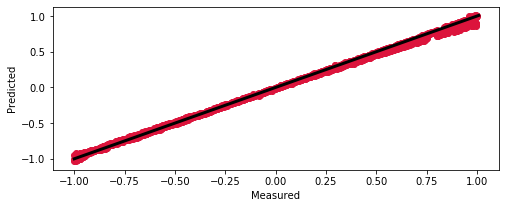

In [181]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

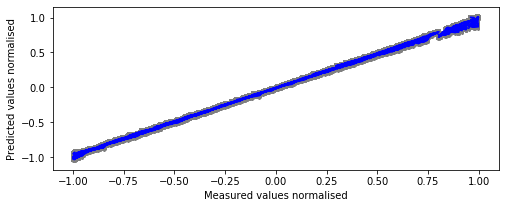

In [182]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [183]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat, scaler), unscale(y_test, scaler)


In [184]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

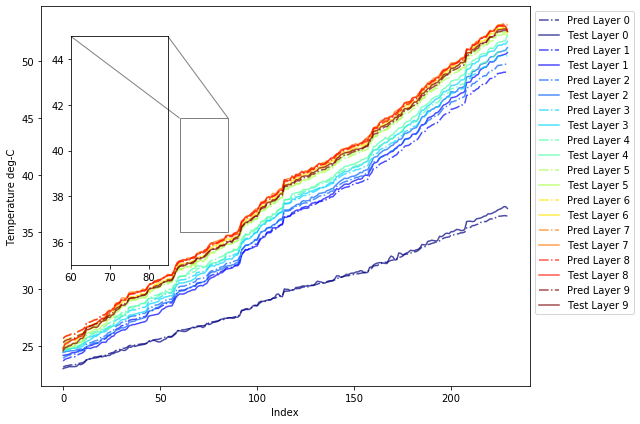

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcf725a7750>)

In [185]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled, y_test_unscaled, alpha =0.7, scm=None)